In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
d=pd.read_csv("IRIS.CSV.xls")

In [3]:
d.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
d.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
d.shape

(150, 5)

In [8]:
d.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
d["species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [10]:
sum(d.duplicated())

3

In [11]:
d = d.drop_duplicates()
d

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


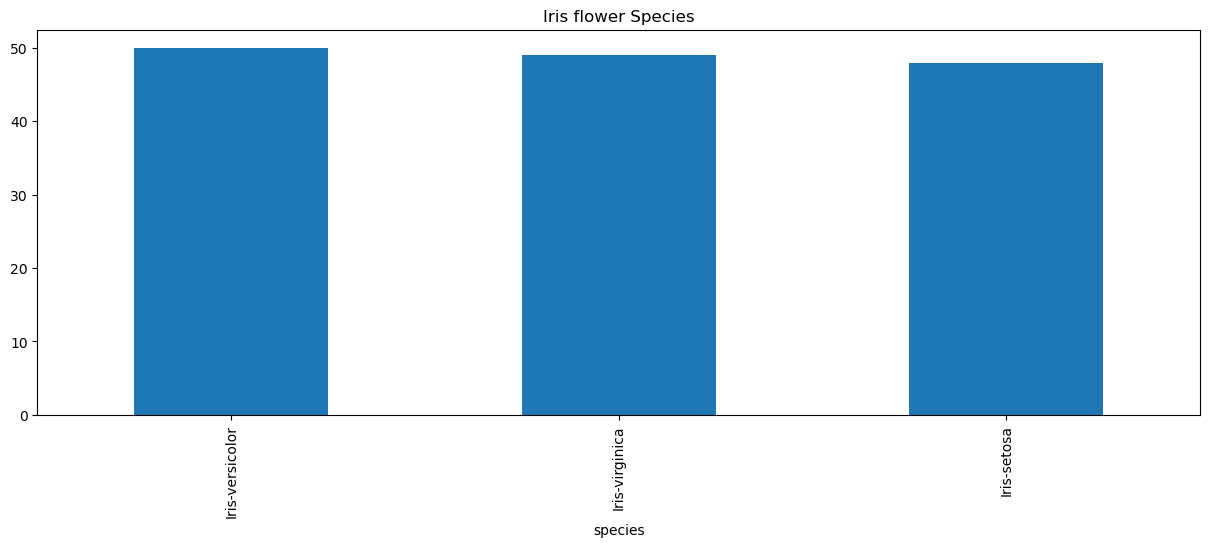

In [12]:
d["species"].value_counts().plot(kind = "bar", title = "Iris flower Species", figsize = (15,5))
plt.show()

In [13]:
d.replace({"species":{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21216\2708507409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.replace({"species":{"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}}, inplace=True)


<Axes: >

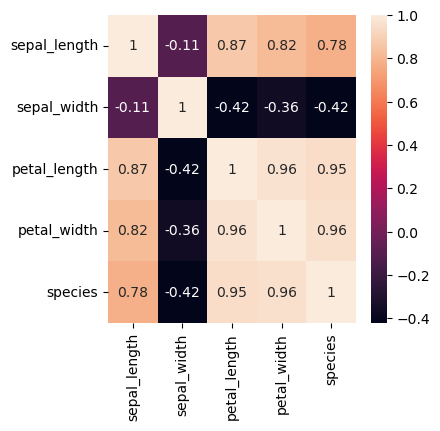

In [14]:
numerical_columns = d.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(4, 4))
sns.heatmap(numerical_columns.corr(), annot=True)

<Figure size 1600x900 with 0 Axes>

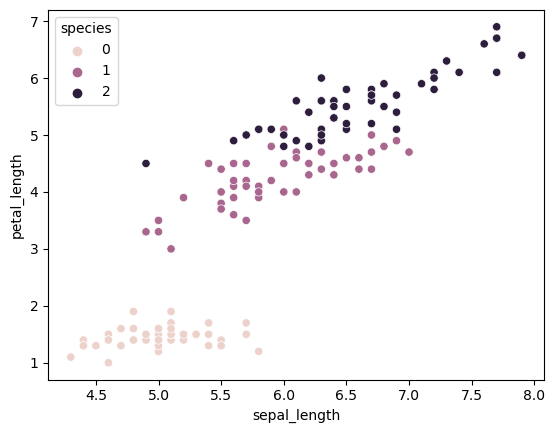

<Figure size 1600x900 with 0 Axes>

In [15]:
sns.scatterplot(x='sepal_length', y='petal_length', hue='species', data=d)
plt.figure(figsize=(16,9))

<Figure size 1600x900 with 0 Axes>

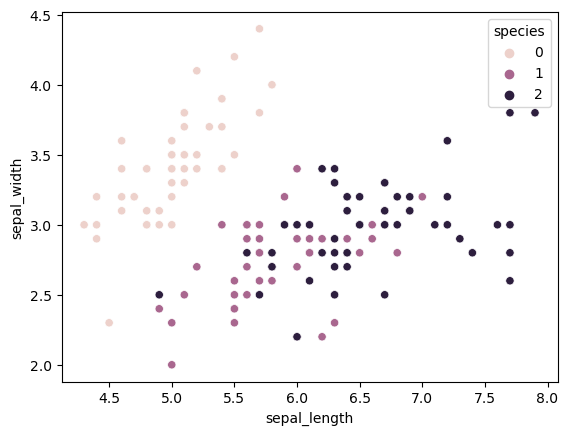

<Figure size 1600x900 with 0 Axes>

In [16]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=d)
plt.figure(figsize=(16,9))

In [17]:
x=d.iloc[:,0:1]
x.head()

,sepal_length
0,5.1
1,4.9
2,4.7
3,4.6
4,5.0


In [18]:
y=d['species']

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 50, test_size = 0.25)

In [20]:
d=DecisionTreeClassifier(min_samples_split=50,criterion = 'entropy')
d.fit(x_train,y_train)
y_pred = d.predict(x_test)
print("Accuracy of decision tree prediction:"+str(accuracy_score(y_true=y_test,y_pred=y_pred)))

Accuracy of decision tree prediction:0.5945945945945946


In [23]:
from sklearn.linear_model import LogisticRegression #Imports the LogisticRegression class from Scikit-Learn
logreg=LogisticRegression() #Initializes an instance of LogisticRegression.
logreg.fit(x_train,y_train)

LogisticRegression()

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
x_train_prediction=logreg.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
x_test_prediction=logreg.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.7909090909090909
accuracy on test data: 0.6216216216216216


In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier().fit(x_train,y_train)

In [27]:
x_train_prediction=dtc.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=dtc.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.8090909090909091
accuracy on test data: 0.5675675675675675


In [28]:
#k nearest neighbour
from sklearn.neighbors import KNeighborsClassifier #imports the KNN classifier from the sklearn.neighbors module.
knn=KNeighborsClassifier() #creates an instance of the KNN classifier. By default, it uses 5 neighbors.
knn.fit(x_train,y_train)#trains the KNN model using the training data (x_train and y_train).

KNeighborsClassifier()

In [29]:
#To train the classification model using the KNN algorithm:
x_train_prediction=knn.predict(x_train)
training_Data_accuracy=accuracy_score(x_train_prediction,y_train)
print("accuracy on training data:",training_data_accuracy)
#accuracy on test data
x_test_prediction=knn.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.8090909090909091
accuracy on test data: 0.6486486486486487


In [30]:
#To train the classification model using the Naive bayes algorithm:
from sklearn.naive_bayes import GaussianNB #Imports the Gaussian Naive Bayes classifier from the sklearn.naive_bayes module.
gnb=GaussianNB() #creates an instance of the GaussianNB classifier
gnb.fit(x_train,y_train) #trains the Gaussian Naive Bayes model using the training data (x_train and y_train)

GaussianNB()

In [31]:
#accuracy on training data
x_train_prediction=gnb.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=gnb.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('accuracy on test data:',test_data_accuracy)

accuracy on training data: 0.7818181818181819
accuracy on test data: 0.5675675675675675


In [32]:
#To train the classification model using the SVM algorithm:'''
from sklearn import svm #imports the SVM module from the sklearn library.
svm=svm.SVC(kernel='linear') #creates an instance of the SVM classifier with a linear kernel.
svm.fit(x_train,y_train) #trains the SVM model using the training data (x_train and y_train).

SVC(kernel='linear')

In [33]:
#accuracy on training data-svm
x_train_prediction=svm.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)
#accuracy on test data
x_test_prediction=svm.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.7818181818181819
Accuracy on test data: 0.6486486486486487
